<a href="https://www.kaggle.com/code/xenowing/image-classification-using-cnn?scriptVersionId=185438669" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-06-25 19:56:05.361721: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 19:56:05.361850: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 19:56:05.480225: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Load and Preprocess the data

In [2]:
#Define paths
train_dir='/kaggle/input/dogs-cats-dataset/train'
test_dir='/kaggle/input/dogs-cats-dataset/test1'

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Create a image datagen
train_datagen=ImageDataGenerator(
rescale=1/255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
validation_split=0.2)

test_datagen=ImageDataGenerator(rescale=1/255)

#Load train and validation data
train_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(128,128),
batch_size=32,
class_mode='binary',
subset='training') #Set as training data

validation_generator=train_datagen.flow_from_directory(
train_dir,
target_size=(128,128),
batch_size=32,
class_mode='binary',
subset='validation')

#Load test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 4800 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1200 images belonging to 1 classes.


### Image classification 
can be done efficiently using various types of neural network architectures. Below are some of the most common and effective architectures used in the field:

#### 1. Convolutional Neural Networks (CNNs)
* **LeNet**: One of the earliest CNN architectures, developed by Yann LeCun for handwritten digit recognition.
* **AlexNet**: Won the ImageNet competition in 2012 and popularized deep learning for image classification.
* **VGGNet**: Known for its simplicity, using very small (3x3) convolution filters, but having a deep architecture (16 or 19 layers).
* **GoogLeNet (Inception)**: Introduced the Inception module, allowing for more efficient computation by using filters of different sizes in parallel.
* **ResNet**: Introduced the concept of residual connections to solve the vanishing gradient problem, allowing for very deep networks (e.g., 50, 101, 152 layers).
* **DenseNet**: Uses dense connections between layers to improve gradient flow and reduce the number of parameters.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

# Define the CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Display model summary to verify architecture
cnn_model.summary()

# Train the model
history_cnn = cnn_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-06-25 19:56:25.002060: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31758: 7.18885, expected 6.34915
2024-06-25 19:56:25.002119: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31794: 6.79032, expected 5.95062
2024-06-25 19:56:25.002136: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31795: 6.91364, expected 6.07395
2024-06-25 19:56:25.002156: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31796: 7.21123, expected 6.37153
2024-06-25 19:56:25.002168: E external/local_xla/xla/service/gpu/buffer_

  1/150 ━━━━━━━━━━━━━━━━━━━━ 24:54 10s/step - accuracy: 0.5000 - loss: 0.6934

I0000 00:00:1719345389.010365      87 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 69s 394ms/step - accuracy: 0.5241 - loss: 0.7811 - val_accuracy: 0.6039 - val_loss: 0.6620
Epoch 2/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-25 19:57:27.991848: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 20279: 3.63212, expected 3.13652
2024-06-25 19:57:27.991976: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 30190: 3.63212, expected 3.13652
2024-06-25 19:57:27.992004: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31831: 5.49767, expected 4.81794
2024-06-25 19:57:27.992016: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31929: 5.27093, expected 4.5912
2024-06-25 19:57:27.992026: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 31931: 5.73549, ex

150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6460
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 226ms/step - accuracy: 0.6030 - loss: 0.6693 - val_accuracy: 0.5904 - val_loss: 0.6681
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5930
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 227ms/step - accuracy: 0.6127 - loss: 0.6622 - val_accuracy: 0.6334 - val_loss: 0.6414
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8750 - val_loss: 0.5142
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 227ms/step - accuracy: 0.6259 - loss: 0.6419 - val_accuracy: 0.6613 - val_loss: 0.6141
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.4378
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 227ms/step - accuracy: 0

In [5]:
#Evaluate the model
val_loss,val_accuracy=cnn_model.evaluate(validation_generator,
                                        steps=validation_generator.samples//validation_generator.batch_size)
print(f"Validation Accuracy:{val_accuracy*100:.2f}")
print(f"Validation Loss:{val_loss:.4f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.7032 - loss: 0.6036
Validation Accuracy:70.27
Validation Loss:0.5937


In [6]:
#Calcualte the train accuracy and loss
train_generator.reset()
train_loss,train_accuracy=cnn_model.evaluate(train_generator,verbose=1)
print(f"Training Accuracy:{train_accuracy*100:.2f}")
print(f"Training Loss:{train_loss:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 28s 189ms/step - accuracy: 0.7024 - loss: 0.5870
Training Accuracy:70.25
Training Loss:0.5856


2024-06-25 20:00:27.580018: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4610: 3.93875, expected 3.42964
2024-06-25 20:00:27.580124: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 14521: 3.93875, expected 3.42964
2024-06-25 20:00:27.580140: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15882: 6.56496, expected 5.80551
2024-06-25 20:00:27.580148: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15918: 5.95458, expected 5.19513
2024-06-25 20:00:27.580156: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15919: 6.47927, expected 5.71982
2024-06-25 20:00:27.580163: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15927: 6.48245, expected 5.723
2024-06-25 20:00:27.580171: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 15928: 6.2255, expected 5.46605
2024-06-25 20:00:27.580179: E e

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step


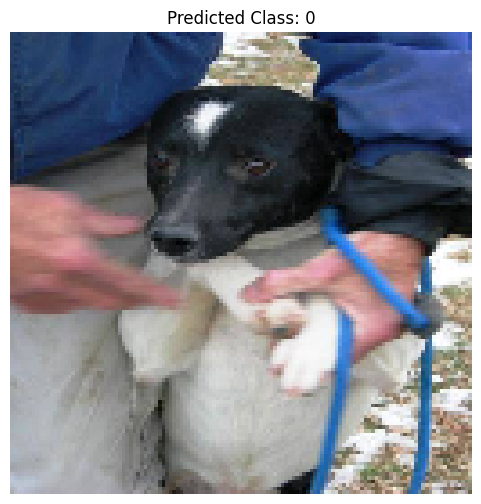

In [7]:
test_generator.reset()

try:
    # Get a batch of test images (batch size 1)
    test_batch = next(test_generator)

    if len(test_batch[0]) == 0:
        raise ValueError("Empty batch received from test_generator. Check generator configuration.")

    # Assuming batch size is 1, extract the first image
    test_image = test_batch[0][0]  # assuming image is the first element in the batch

    # Reshape the image for prediction (if needed)
    test_image = np.expand_dims(test_image, axis=0)

    # Predict labels for the test image
    y_pred = cnn_model.predict(test_image)
    predicted_class = np.argmax(y_pred, axis=1)[0]

    # Display the image with its predicted class
    plt.figure(figsize=(6, 6))
    plt.imshow(test_batch[0][0])
    plt.axis('off')
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()

except StopIteration:
    print("No more batches available in the test generator.")
except ValueError as ve:
    print(f"ValueError: {ve}")
except IndexError as ie:
    print(f"IndexError: {ie}. Check if the test generator is empty or misconfigured.")
except Exception as e:
    print(f"Error occurred: {e}")

### Performance Metrics 

In [8]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

#Function to get true labels and predictions'
def get_labels_and_predictions(generator,model):
    generator.reset()
    true_labels=[]
    predictions=[]
    for i in range(generator.samples//generator.batch_size):
        batch=next(generator)
        images,labels=batch[0],batch[1]
        preds=model.predict(images)
        preds=np.round(preds).flatten()
        true_labels.extend(labels)
        predictions.extend(preds)
    return np.array(true_labels),np.array(predictions)

#Gte true labels and predictions for training set 
train_true_labels,train_predictions=get_labels_and_predictions(train_generator,cnn_model)

#Get true labels and predictions for validation set
validation_true_labels,validation_predictions=get_labels_and_predictions(validation_generator,cnn_model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━

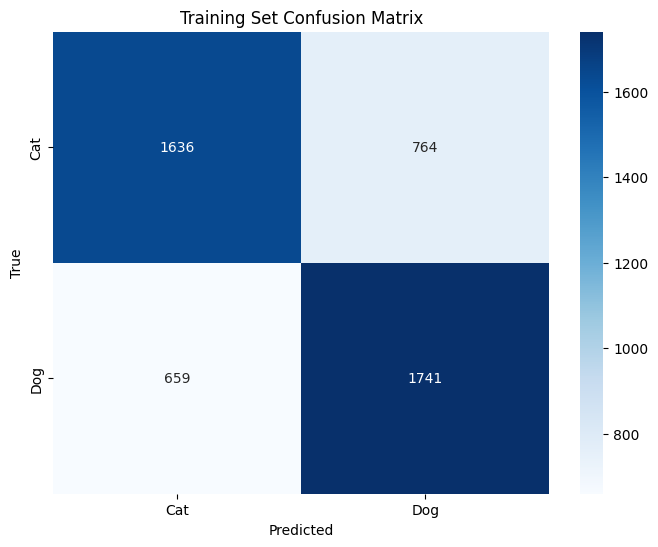

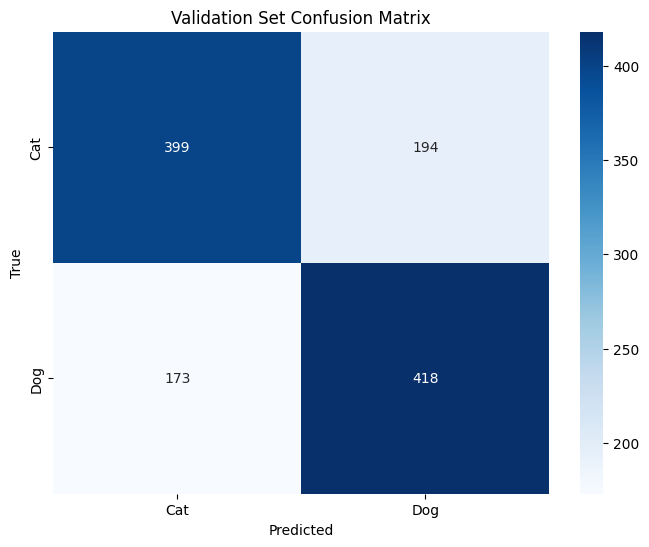

Training Set Classification Report
              precision    recall  f1-score   support

         Cat       0.71      0.68      0.70      2400
         Dog       0.70      0.73      0.71      2400

    accuracy                           0.70      4800
   macro avg       0.70      0.70      0.70      4800
weighted avg       0.70      0.70      0.70      4800

Validation Set Classification Report
              precision    recall  f1-score   support

         Cat       0.70      0.67      0.68       593
         Dog       0.68      0.71      0.69       591

    accuracy                           0.69      1184
   macro avg       0.69      0.69      0.69      1184
weighted avg       0.69      0.69      0.69      1184



In [9]:
# Function to get true labels and predictions
def get_labels_and_predictions(generator, model):
    generator.reset()  # Reset generator
    true_labels = []
    predictions = []
    
    for i in range(generator.samples // generator.batch_size):
        batch = next(generator)
        images, labels = batch[0], batch[1]
        preds = model.predict(images)
        preds = np.round(preds).flatten()  # Assuming binary classification and sigmoid activation
        true_labels.extend(labels)
        predictions.extend(preds)
    
    return np.array(true_labels), np.array(predictions)

# Get true labels and predictions for training set 
train_true_labels, train_predictions = get_labels_and_predictions(train_generator, cnn_model)

# Get true labels and predictions for validation set
validation_true_labels, validation_predictions = get_labels_and_predictions(validation_generator, cnn_model)

# Function to plot confusion matrix
def plot_confusion_matrix(true_labels, predictions, title):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for training set
plot_confusion_matrix(train_true_labels, train_predictions, 'Training Set Confusion Matrix')

# Plot confusion matrix for validation set
plot_confusion_matrix(validation_true_labels, validation_predictions, 'Validation Set Confusion Matrix')

# Print classification reports
print("Training Set Classification Report")
print(classification_report(train_true_labels, train_predictions, target_names=['Cat', 'Dog']))

print("Validation Set Classification Report")
print(classification_report(validation_true_labels, validation_predictions, target_names=['Cat', 'Dog']))


#### 2. Transformers
* **Vision Transformers (ViTs)**: Adapted the transformer architecture, originally designed for NLP tasks, to image classification by treating image patches as tokens.

#### 3. Hybrid Models
* **Convolutional Vision Transformers (CvTs)**: Combine the strengths of CNNs and transformers to leverage both local feature extraction and global context understanding.

#### 4. Capsule Networks
* **CapsNet**: Introduced by Geoffrey Hinton, these networks aim to address some of the limitations of CNNs by preserving spatial hierarchies between features.

#### 5. Attention-based Models
* **Attention Augmented Convolutional Networks**: Enhance traditional CNNs with self-attention mechanisms to better capture global dependencies.

#### 6. Efficient Models
* **MobileNet**: Designed for mobile and embedded vision applications, using depthwise separable convolutions to reduce the number of parameters.
* **SqueezeNet**: Achieves AlexNet-level accuracy with 50x fewer parameters, making it suitable for deployment on devices with limited computational resources.
* **EfficientNet**: Uses a compound scaling method to uniformly scale all dimensions of depth, width, and resolution to achieve better performance with fewer parameters.

#### 7. Generative Models
* **GANs (Generative Adversarial Networks)**: Can be used indirectly for image classification by generating realistic images and using a discriminator network for classification tasks.

* **ResNet**: Introduced the concept of residual connections to solve the vanishing gradient problem, allowing for very deep networks (e.g., 50, 101, 152 layers).

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 54s 276ms/step - accuracy: 0.5014 - loss: 0.7075 - val_accuracy: 0.5000 - val_loss: 0.6816
Epoch 2/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 71s 231ms/step - accuracy: 0.5531 - loss: 0.6826 - val_accuracy: 0.6042 - val_loss: 0.6670
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.5817 - loss: 0.6729 - val_accuracy: 0.6108 - val_loss: 0.6600
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 233ms/step - accuracy: 0.5788 - loss: 0.6706 - val_accuracy: 0.6483 - val_loss: 0.6536
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.6152 - loss: 0.6612 - val_accuracy: 0.6283 - val_loss: 0.6526
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 231ms/step - accuracy: 0.6111 - loss: 0.6576 - val_accuracy: 0.6142 - val_loss: 0.6522
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 229ms/step - accuracy: 0.5991 - loss: 0.6601 - val_accuracy: 0.6542 - val_loss: 0.6405
Epoch 8/10
150/150 ━━━━━━━━━━━━━

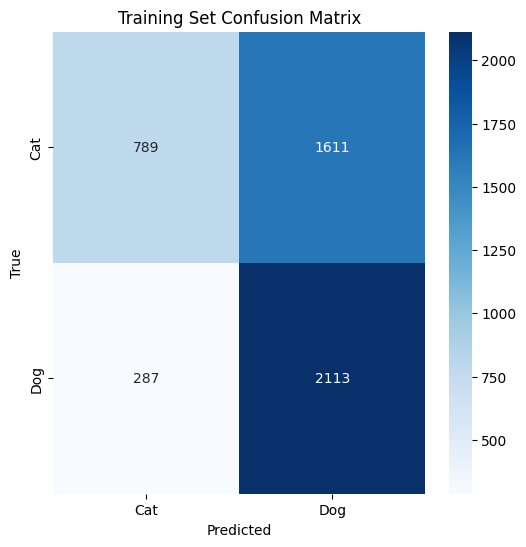

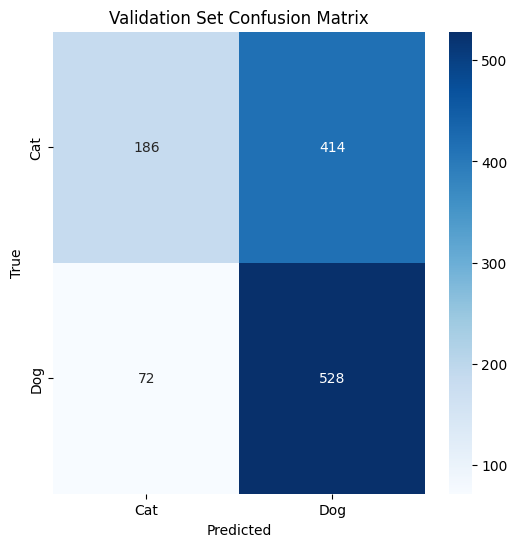

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Construct the final model
res_net = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
res_net.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
res_net.fit(train_generator, epochs=10, validation_data=validation_generator)

# Function to get true labels and predictions
def get_labels_and_predictions(generator, model):
    generator.reset()
    true_labels = []
    predictions = []
    for i in range(len(generator)):
        images, labels = next(generator)
        preds = res_net.predict(images)
        preds = np.round(preds).flatten()
        true_labels.extend(labels)
        predictions.extend(preds)
    return np.array(true_labels), np.array(predictions)

# Get true labels and predictions for training and validation sets
train_true_labels, train_predictions = get_labels_and_predictions(train_generator, res_net)
validation_true_labels, validation_predictions = get_labels_and_predictions(validation_generator, res_net)

# Plot confusion matrices
def plot_confusion_matrix(true_labels, predictions, title):
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(train_true_labels, train_predictions, 'Training Set Confusion Matrix')
plot_confusion_matrix(validation_true_labels, validation_predictions, 'Validation Set Confusion Matrix')

In [11]:
# Calculate and print accuracy and loss for training set
train_loss, train_accuracy = res_net.evaluate(train_generator)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Calculate and print accuracy and loss for validation set
val_loss, val_accuracy = res_net.evaluate(validation_generator)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 195ms/step - accuracy: 0.6055 - loss: 0.6538
Training Accuracy: 59.92%
Training Loss: 0.6529
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 190ms/step - accuracy: 0.5925 - loss: 0.6498
Validation Accuracy: 59.42%
Validation Loss: 0.6493


### Conclusion: ResNet
* ResNET is a one of type of CNN model.
* 2015-Residual Learning for Image Recoginition
* It address the problem of Vanishing Gradient Problem.
* It generalises better that normal CNN.

* **AlexNet**: Won the ImageNet competition in 2012 and popularized deep learning for image classification.

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def AlexNet(input_shape=(227, 227, 3), num_classes=1):
    model = Sequential()

    # Layer 1: Convolutional layer with ReLU activation and max pooling
    model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 2: Convolutional layer with ReLU activation and max pooling
    model.add(Conv2D(256, kernel_size=(5, 5), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 3: Convolutional layer with ReLU activation
    model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

    # Layer 4: Convolutional layer with ReLU activation
    model.add(Conv2D(384, kernel_size=(3, 3), padding='same', activation='relu'))

    # Layer 5: Convolutional layer with ReLU activation and max pooling
    model.add(Conv2D(256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten the CNN output so that we can connect it with fully connected layers
    model.add(Flatten())

    # Layer 6: Fully connected layer with ReLU activation
    model.add(Dense(4096, activation='relu'))

    # Add Dropout regularization
    model.add(Dropout(0.5))

    # Layer 7: Fully connected layer with ReLU activation
    model.add(Dense(4096, activation='relu'))

    # Add Dropout regularization
    model.add(Dropout(0.5))

    # Output Layer with sigmoid activation for binary classification
    model.add(Dense(num_classes, activation='sigmoid'))

    return model

# Initialize the AlexNet model
alex_net = AlexNet(input_shape=(128, 128, 3), num_classes=1)

# Compile the model
alex_net.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display the model architecture
alex_net.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 384)      │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 384)      │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │     4,198,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         4,097 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,731,009 (94.34 MB)

 Trainable params: 24,731,009 (94.34 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the model
history_alex= alex_net.fit(train_generator,
                    steps_per_epoch=train_generator.samples // train_generator.batch_size,
                    epochs=10,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // validation_generator.batch_size)

# Evaluate the model on validation set
train_loss, train_acc = alex_net.evaluate(train_generator,
                                   steps=train_generator.samples // train_generator.batch_size)
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

# Evaluate the model on validation set
val_loss, val_acc = alex_net.evaluate(validation_generator,
                                   steps=validation_generator.samples // validation_generator.batch_size)
print(f"Validation Accuracy: {val_acc*100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")


Epoch 1/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 235ms/step - accuracy: 0.4939 - loss: 0.7225 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 2/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6933
Epoch 3/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.4918 - loss: 0.6939 - val_accuracy: 0.5008 - val_loss: 0.6931
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 615us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.4375 - val_loss: 0.6934
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 230ms/step - accuracy: 0.4987 - loss: 0.6933 - val_accuracy: 0.5017 - val_loss: 0.6932
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3750 - val_loss: 0.6955
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 35s 226ms/step - accuracy: 0.4935 - loss: 0.6935 - val_accuracy: 0.4983 - val_loss: 0.6933
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.6902
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 233ms/step - accuracy: 0

 2/37 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.0000e+00 - loss: 0.6978

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.0000e+00 - loss: 0.6978
Test Accuracy: 0.00%
Test Loss: 0.6978
37/37 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 876ms/step


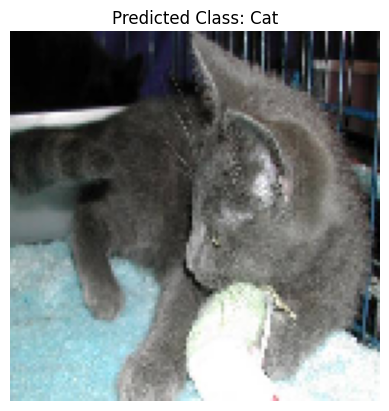

In [14]:
# Evaluate the model on the test set
test_loss, test_acc = alex_net.evaluate(test_generator,
                                     steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

test_generator.reset()
predictions = alex_net.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)

# Assuming batch size is 1, extract the first image and visualize it with its predicted class
test_batch = next(test_generator)
test_image = test_batch[0][2]

# Predict label for the test image
prediction = alex_net.predict(test_image.reshape(1, 128, 128, 3))[0]

plt.imshow(test_image)
plt.title(f"Predicted Class: {'Dog' if prediction > 0.5 else 'Cat'}")
plt.axis('off')
plt.show()

### Conclusion - AlexNet
* Its one of first CNN models with 8 layers.
* It is primitive effective model for image classification

* **VGGNet**: Known for its simplicity, using very small (3x3) convolution filters, but having a deep architecture (16 or 19 layers).

In [15]:
from keras.optimizers import Adam

IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32
NUM_CLASSES = 1  # For binary classification, use 1 output unit

def create_vggnet():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    
    # Classification block
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(NUM_CLASSES, activation='sigmoid'))  # Use sigmoid for binary classification
    
    return model

# Assuming train_generator and validation_generator are defined correctly

# Create the VGGNet model
vgg_model = create_vggnet()

vgg_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',  # Use binary_crossentropy for binary classification
                  metrics=['accuracy'])

history_vgg = vgg_model.fit(train_generator,
                            steps_per_epoch=train_generator.samples // BATCH_SIZE,
                            epochs=10,
                            validation_data=validation_generator,
                            validation_steps=validation_generator.samples // BATCH_SIZE)

train_loss, train_acc = vgg_model.evaluate(train_generator, steps=train_generator.samples // BATCH_SIZE)
print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Training Loss: {train_loss:.4f}")

val_loss, val_acc = vgg_model.evaluate(validation_generator, steps=validation_generator.samples // BATCH_SIZE)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")
print(f"Validation Loss: {val_loss:.4f}")

Epoch 1/10


2024-06-25 20:14:42.699126: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 0: 4.34782, expected 3.51669
2024-06-25 20:14:42.699187: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 1: 6.71977, expected 5.88864
2024-06-25 20:14:42.699202: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 2: 6.95696, expected 6.12583
2024-06-25 20:14:42.699216: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 3: 6.48105, expected 5.64992
2024-06-25 20:14:42.699227: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 4: 5.32797, expected 4.49684
2024-06-25 20:14:42.699237: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 5: 5.7497, expected 4.91857
2024-06-25 20:14:42.699248: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 6: 6.01592, expected 5.18479
2024-06-25 20:14:42.699258: E external/local_xla/xla/ser

  2/150 ━━━━━━━━━━━━━━━━━━━━ 11s 80ms/step - accuracy: 0.4297 - loss: 0.6934 

W0000 00:00:1719346499.160280      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.4820 - loss: 0.6938

W0000 00:00:1719346528.770622      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 60s 242ms/step - accuracy: 0.4821 - loss: 0.6938 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/10


2024-06-25 20:15:35.584002: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12288: 3.16341, expected 2.72723
2024-06-25 20:15:35.584064: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 12416: 3.00427, expected 2.56808
2024-06-25 20:15:35.584110: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16384: 4.67983, expected 3.93377
2024-06-25 20:15:35.584125: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16385: 6.45374, expected 5.70769
2024-06-25 20:15:35.584136: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16386: 6.1411, expected 5.39504
2024-06-25 20:15:35.584147: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16387: 5.93718, expected 5.19113
2024-06-25 20:15:35.584158: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 16388: 4.45506, expected 3.70901
2024-06-25 20:15:35.584168: 

150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/10


W0000 00:00:1719346539.473662      87 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


150/150 ━━━━━━━━━━━━━━━━━━━━ 37s 236ms/step - accuracy: 0.4953 - loss: 0.6933 - val_accuracy: 0.5025 - val_loss: 0.6932
Epoch 4/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3125 - val_loss: 0.7033
Epoch 5/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.5153 - loss: 0.6928 - val_accuracy: 0.4992 - val_loss: 0.6935
Epoch 6/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.6905
Epoch 7/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 234ms/step - accuracy: 0.4911 - loss: 0.6937 - val_accuracy: 0.4992 - val_loss: 0.6931
Epoch 8/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 0.6931
Epoch 9/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 36s 232ms/step - accuracy: 0.5055 - loss: 0.6932 - val_accuracy: 0.5017 - val_loss: 0.6931
Epoch 10/10
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.0000

### Conclusion - VGG Archectect
* These results indicate that the VGGNet model, as currently configured and trained, is not learning meaningful patterns from the data. It's performing close to random guessing, which could be due to several reasons:
   1. Insufficient Training Data: The dataset may be too small or not diverse enough for the model to learn effectively.
   2. Model Complexity: VGGNet is a deep model, and if not trained with sufficient data or regularization techniques, it can easily overfit or fail to generalize.
   3. Hyperparameters: Learning rate, batch size, optimizer choice, etc., could also impact model performance.